<a href="https://colab.research.google.com/github/khanh22mse23057/python4engineer-assignments/blob/main/Assignments2_Overview_M5_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cài đặt môi trường

In [1]:
# Một số functions trong bài không work với latest version, nên cài đặt packages version chỉ định như sau
!pip install opendatasets
!pip install pandas==1.2.0
!pip install pystan==3.0.0

!pip install kaggle
!pip install unzip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 28.9 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41.9 MB 7.6 MB/s 
     |████████████████████████████████| 1.8 MB 62.0 MB/s 
  Attempting uninstall: webargs
    Found existing installation: webargs 8.2.0
    Uninstalling webargs-8.2.0:
      Successfully uninstalled webargs-8.2.0
  Attempting uninstall: httpstan
    Found existing installation: httpstan 4.6.1
    Uninstalling httpstan-4.6.1:
      Successfully uninstalled httpstan-4.6.1
  Attempting uninstall: pystan
    Found existing installatio

## Import dữ liệu train

In [2]:
import os
#Cấu hình secret key để xác thực truy cập đến Kaggle trên môi trường
os.environ['KAGGLE_USERNAME'] = 'khanhphamnguyenphu'
os.environ['KAGGLE_KEY'] = '67b96e181bd01730f8e8ec3cf2b685a7'

!if [ -d ~/.kaggle/ ]; then rm -Rf ~/.kaggle/; fi
!if [ -d ./kaggle/input/ ]; then rm -Rf ./kaggle/input/; fi

!kaggle competitions download -c m5-forecasting-accuracy -p ./kaggle/input/ # Download dữ liệu train từ Kaggle
!unzip  ./kaggle/input/*.zip -d ./kaggle/input/
!ls ./kaggle/input/

 98% 45.0M/45.8M [00:01<00:00, 27.2MB/s]
100% 45.8M/45.8M [00:01<00:00, 28.8MB/s]
Archive:  ./kaggle/input/m5-forecasting-accuracy.zip
  inflating: ./kaggle/input/calendar.csv  
  inflating: ./kaggle/input/sales_train_evaluation.csv  
  inflating: ./kaggle/input/sales_train_validation.csv  
  inflating: ./kaggle/input/sample_submission.csv  
  inflating: ./kaggle/input/sell_prices.csv  
calendar.csv		     sales_train_evaluation.csv  sample_submission.csv
m5-forecasting-accuracy.zip  sales_train_validation.csv  sell_prices.csv


## **Đọc dữ liệu train vào pandas dataframes**

In [3]:
# Ẩn warning khi runtime
import warnings
warnings.filterwarnings("ignore")


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

#Đọc dữ liệu train vào pandas dataframes
sale2 = pd.read_csv('/content/kaggle/input/sales_train_validation.csv')
cale4 = pd.read_csv('/content/kaggle/input/calendar.csv')
prices = pd.read_csv("/content/kaggle/input/sell_prices.csv")

#Kiểm tra lại dữ liệu đã đọc
sale2.info()
cale4.info()
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), object(6)
memory usage: 446.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB
<c

In [5]:
import numpy as np
import seaborn as sns
import datetime

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(12,6)}) # Đặt kích thước của W x H của biểu đồ

# **Sửa đổi tên các cột có tên dạng ngày tháng**
from d_* to corresponding Dates

In [6]:
# sale2.columns

In [7]:
# format lại tên các cột ngày tháng trước khi trực quan 
x = datetime.date(2011,1,29)
for c in ((sale2.columns)[6:]):
    sale2.rename(columns={c:x},inplace=True)
    x = x + datetime.timedelta(days=1)

In [8]:
# sale2.columns

# **Biểu đồ hiện thị 5 sản đầu theo chuỗi thời gian**

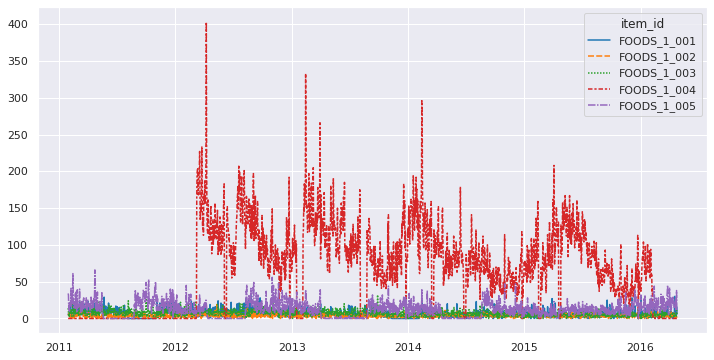

In [9]:
sns.set(rc={'figure.figsize':(12,6)}) # Đặt kích thước của W x H của biểu đồ

# Tính tổng doanh thu theo ngày tháng (6 cột đầu ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'] )
# Từ index 6 trở đi là cột dữ liệu theo ngày tháng năm
X = sale2.groupby('item_id')[(sale2.columns)[6:]].sum() # Gom nhóm dữ liệu theo sản phần (item_id) và tính tổng sales
# Sử dụng biểu đồ dạng lineplot trong Seaborn
sns.lineplot(data=X[:5].T, palette="tab10", linewidth=1.5) # Lấy dữ liệu 5 product sau đó chuyển vị dữ liểu trước khi vẽ

# **Biểu đồ tổng doanh thu theo chuỗi thời gian**

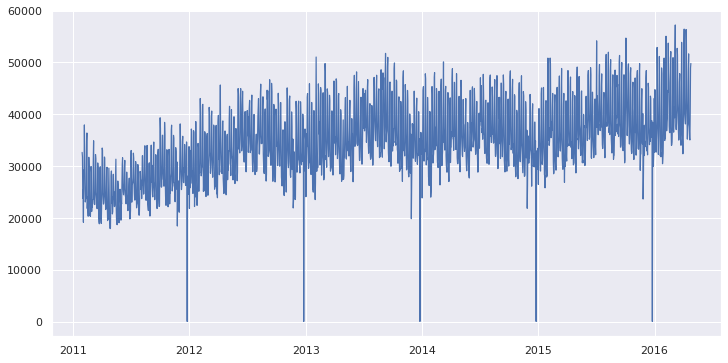

In [10]:
# Sử dụng lineplot để vẽ lại biểu đồ
sns.lineplot(data=X.sum(), palette="tab10", linewidth=1.2) 

# **Biểu đồ doanh thu hàng tháng theo bang**

In [11]:
X = sale2
X = X.groupby(X.columns.map(lambda x : x if type(x) == str else x.strftime('%Y-%m')),axis=1).sum() 
for c in ((X.columns)[:-6]):
    x= datetime.datetime.strptime(c, '%Y-%m').date() #format lại ngày tháng từ string
    X.rename(columns={c:x},inplace=True)

In [12]:
# X

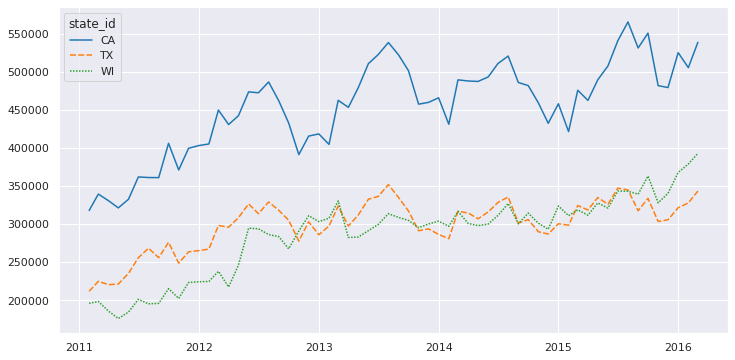

In [13]:
# 2 row dữ liệu đầu tiên và cuối cùng khá tạp nên cần loại bỏ trước khi vẽ
# Nên chỉ lấy tệp data từ 1 -> lenght - 1 
src = X.groupby(['state_id'])[(X.columns)[:-6]].sum()
sns.lineplot(data=src.T[1:-1], palette="tab10", linewidth=1.5) 

# **Biểu đồ doanh thu hàng tháng theo danh mục sản phẩm**

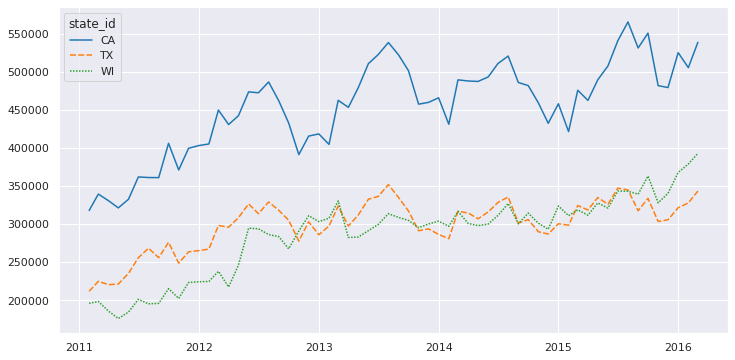

In [14]:
F = X.groupby(['cat_id'])[(X.columns)[:-6]].sum()
sns.lineplot(data=src.T[1:-1], palette="tab10", linewidth=1.5)

# **Biểu đồ tổng doanh thu theo danh mục sản phẩm**

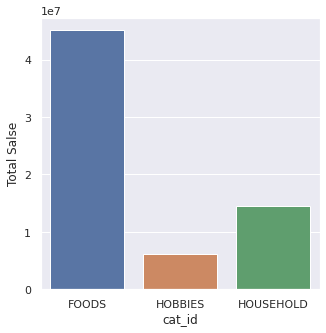

In [15]:
F = X.groupby(['cat_id'])[(X.columns)[:-6]].sum()
src = F.sum(axis=1).reset_index(name ='Total Salse')
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(data= src, x="cat_id", y = "Total Salse")

# **Biều đồ doanh thu hàng tháng theo cửa hàng**

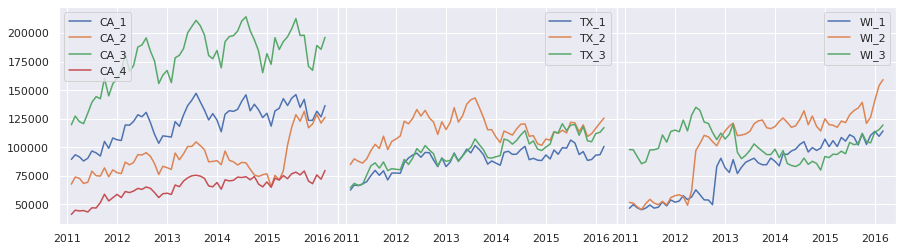

In [45]:
src = X.groupby(['store_id'])[(X.columns)[:-6]].sum() #
fig, ax = plt.subplots(1, 3, sharey=True, figsize = (15,4))
fig.subplots_adjust(wspace=0.0)

for i in range(10):

    # phân loại dữ liệu thanh 1 mảng 3 phần tử cho chart => [0] : 
    #  [0] => Chart CA, [1] => Chart TX, [3] => Chart [WI]
    n = lambda x : 0 if x == 'C' else (1 if x == 'T' else 2) 
    n = n(src.index[i][0])

    # Vẽ chart
    sns.lineplot(ax=ax[n], data=src.iloc[i,1:-1], palette="tab10", linewidth=1.5, label=src.index[i])
    ax[n].set(ylabel='')

# **Biều đồ doanh thu hàng tháng các bộ phận trên 3 tiểu bang**


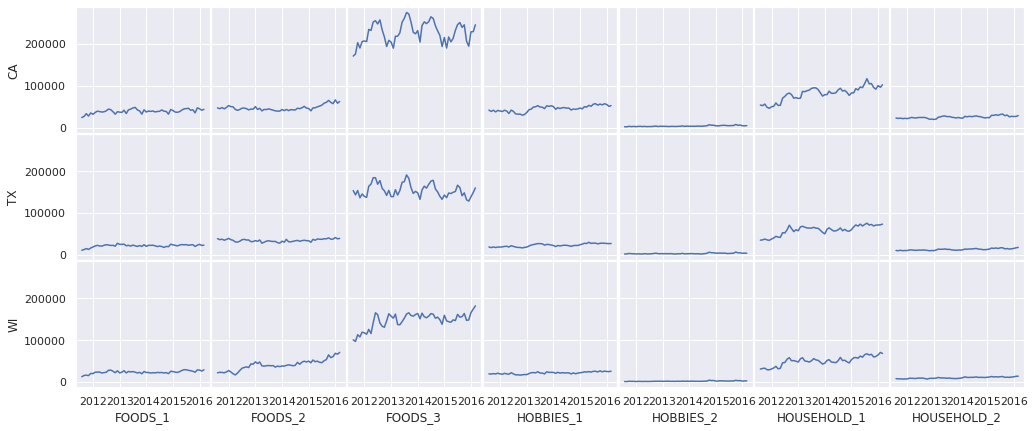

In [17]:
src = X.groupby(['state_id','dept_id'])[(X.columns)[6:]].sum()

# Tạo 1 map chart 3 row 7 col có size image : 17x7
fig, ax = plt.subplots(3, 7, sharey=True,sharex=True,figsize = (17,7))
fig.subplots_adjust( hspace = 0.01,wspace=0.01)

for i in range(3):
    for j in range(7):
        k = (7*i)+(j)
        sns.lineplot(ax=ax[i,j], data=src.iloc[k,1:-1], palette="tab30", linewidth=1.5)
        ax[i,j].set(xlabel = src.index[k][1], ylabel = src.index[k][0])

for a in ax.flat:
    a.label_outer()

# **Total Sales with Smoothing fit**

In [18]:
F = sale2.drop(labels=[datetime.date(2011, 12, 25),datetime.date(2012, 12, 25), datetime.date(2013, 12, 25),datetime.date(2014, 12, 25),datetime.date(2015, 12, 25)],axis=1)

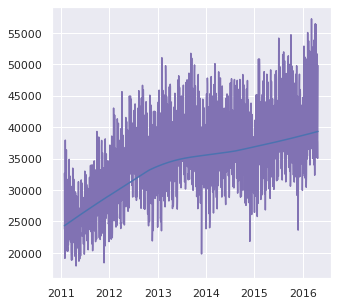

In [19]:
import statsmodels.api as sm # Statsmodels là một gói Python cho phép người dùng khám phá dữ liệu
lowess = sm.nonparametric.lowess

S = F.iloc[:,6:].sum() # Tính tổng doanh thu
z = lowess(S.values, range(S.shape[0]))


plt.plot(S,color='m')
plt.plot(pd.Series(z[:,1],S.index))

# **Biểu đồ tính thời vụ thặng dư**


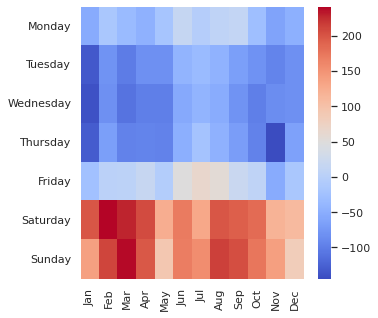

In [20]:
M = F.iloc[:,6:].sum()
z = lowess(M, range(M.shape[0]))
Z = M.values - z[:,1]
A = (pd.DataFrame(data=Z,index=M.index)).T 
A = A.groupby(A.columns.map(lambda x : str(x.weekday())+'-'+str(x.month)),axis=1).sum()
H = np.zeros((7,12))
for i in range(7):
    for j in range(12):
        H[i,j] = A[str(i)+'-'+str(j+1)]//1000        

# plt.figure(None, figsize=(9, 6), dpi=80, facecolor='w', edgecolor='k')
ax = sns.heatmap(H,cmap='coolwarm',xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
                 yticklabels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday' ])
plt.show()

# **Doanh thu các bang trên chuỗi thời gian**

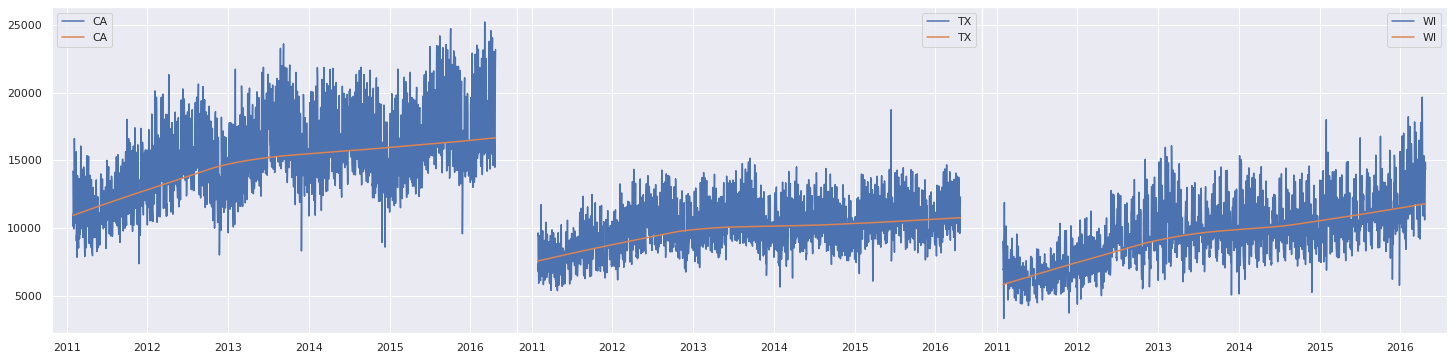

In [21]:

M = F.groupby(['state_id'])[(F.columns)[6:]].sum()

fig, ax = plt.subplots(1, 3, sharey=True, figsize = (25,6))

for i in range(3):
    ax[i].plot(M.iloc[i,:],label=M.index[i])
    z = lowess(M.iloc[i,:].values, range(M.shape[1]))
    ax[i].plot(pd.Series(z[:,1],M.columns),label=M.index[i])
    ax[i].grid(b=True,axis='y')
    ax[i].legend(loc='best')

fig.subplots_adjust( wspace=0.0)
plt.show()


# **Biểu đồ tính thời vụ theo tuần**

In [22]:
mean_sales = F.iloc[:,6:].sum().mean()

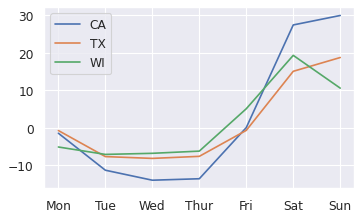

In [23]:
A = M
for i in range(3):
    z = lowess(M.iloc[i,:].values, range(M.shape[1]))
    A.iloc[i,:] = M.iloc[i,:] - z[:,1]
A = A/mean_sales
A = A.groupby(A.columns.map(lambda x : str(x.weekday())),axis=1).sum()
plt.figure(num=None, figsize=(5, 3), dpi=80, facecolor='w', edgecolor='k')
for i in range(3):
    plt.plot(A.iloc[i,:],label=A.index[i])
    plt.xticks(range(0,7),['Mon', 'Tue', 'Wed', 'Thur', 'Fri','Sat','Sun' ])
    plt.legend(loc='best')
plt.show()

# **Biểu đồ tính thời vụ theo tháng**

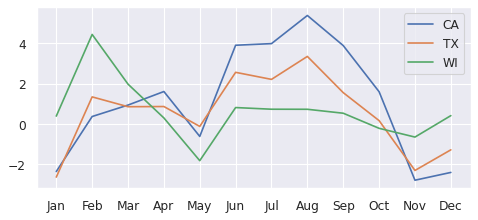

In [24]:

A = M
for i in range(3):
    z = lowess(M.iloc[i,:].values, range(M.shape[1]))
    A.iloc[i,:] = M.iloc[i,:] - z[:,1]
A = A/mean_sales
A = A.groupby(A.columns.map(lambda x : (x.month)),axis=1).sum()
plt.figure(num=None, figsize=(7,3), dpi=80, facecolor='w', edgecolor='k')
for i in range(3):
    plt.plot(A.iloc[i,:],label=A.index[i])
    plt.legend(loc='best')
    plt.xticks(range(1,13),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Tính thời vụ theo tuần và tháng dựa trên doanh thu của các bang và danh mục sản phẩm


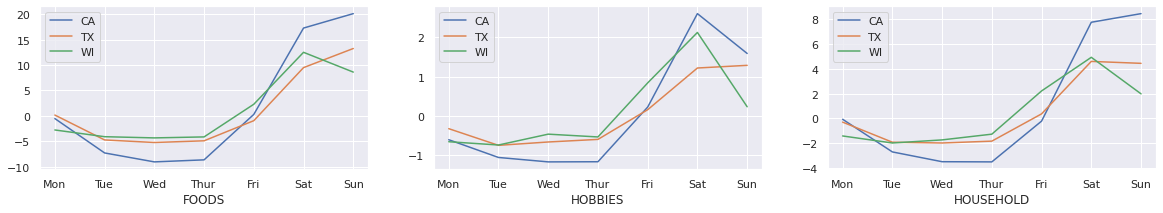

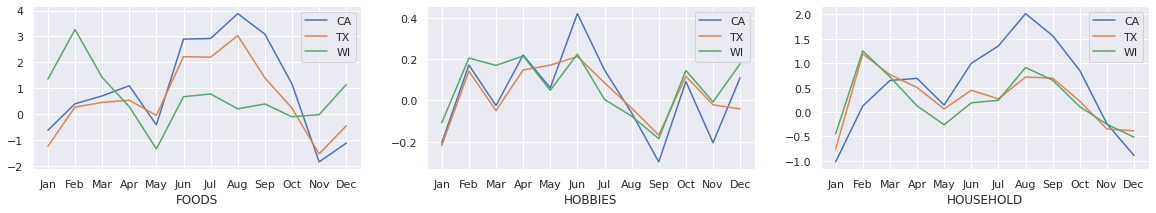

In [25]:
M = F.groupby(['cat_id','state_id'])[(F.columns)[6:]].sum()
A = M
for i in range(9):
    z = lowess(M.iloc[i,:].values, range(M.shape[1]))
    A.iloc[i,:] = M.iloc[i,:] - z[:,1]
G = A/mean_sales
A = G.groupby(G.columns.map(lambda x : str(x.weekday())),axis=1).sum()
fig, ax = plt.subplots(1,3,figsize = (20,3),sharex=True)
for i in range(9):
    ax[(i//3)].plot(A.iloc[i,:],label=A.index[i][1])
    ax[(i//3)].legend(loc='best')
    ax[i//3].set(xlabel = A.index[i][0])
plt.xticks(range(0,7),['Mon', 'Tue', 'Wed', 'Thur', 'Fri','Sat','Sun' ])
plt.show()

B = G.groupby(G.columns.map(lambda x : x.month),axis=1).sum()
fig, ax = plt.subplots(1,3,figsize = (20,3), sharex=True)
for i in range(9):
    ax[(i//3)].plot(B.iloc[i,:],label=B.index[i][1])
    ax[(i//3)].legend(loc='best')
    ax[i//3].set(xlabel = B.index[i][0])
plt.xticks(range(1,13),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()


# **Biểu đồ thể hiện tỉ trọng sự kiện**

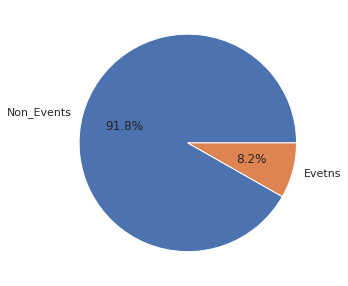

In [26]:
Non_events = cale4.date.count() - cale4.event_name_1.count()
Events = cale4.event_name_1.count()
pd.Series([Non_events,Events], ['Non_Events',"Evetns"],name="").plot.pie(autopct='%1.1f%%')
plt.show()

# **Biểu đồ thể hiện các loại sự kiện**

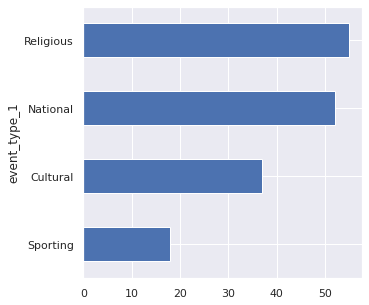

In [27]:

cale4.groupby(['event_type_1']).count().iloc[:,1].sort_values(ascending=True).plot.barh()
plt.show()

# **Phân bổ giá mặt hàng của các bộ phận khác nhau của ba tiểu bang**

In [28]:
A=prices.groupby([prices.store_id.str.slice(0,-2),prices.item_id.str.slice(0,-4)])
B = []
for name, group in A:
    B.append(name)

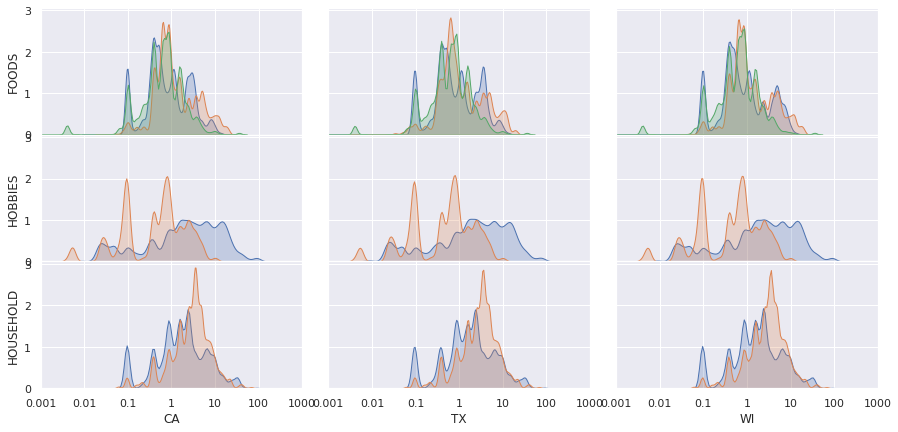

In [29]:
import seaborn as sns
fig, ax = plt.subplots(3,3,sharey=True,sharex=True, figsize=(15,7))
k=0
for j in range(3):
    for i in range(0,1):
        sns.kdeplot(np.log10(A.get_group(B[k])['sell_price']),legend=False,bw=0.1,shade=True,ax=ax[i,j])
        sns.kdeplot(np.log10(A.get_group(B[k+1])['sell_price']),legend=False,bw=0.1,shade=True,ax=ax[i,j])
        sns.kdeplot(np.log10(A.get_group(B[k+2])['sell_price']),legend=False,bw=0.1,shade=True,ax=ax[i,j])
        ax[i,j].grid(b=True,axis='y')
        ax[i,j].set(xlabel = 'CA' if j==0 else ('TX' if j==1 else'WI'), ylabel ="FOODS")
    for i in range(1,2):
        sns.kdeplot(np.log10(A.get_group(B[k+3])['sell_price']),legend=False,bw=0.1,shade=True,ax=ax[i,j])
        sns.kdeplot(np.log10(A.get_group(B[k+4])['sell_price']),legend=False,bw=0.1,shade=True,ax=ax[i,j])
        ax[i,j].grid(b=True,axis='y')
        ax[i,j].set(xlabel = 'CA' if j==0 else ('TX' if j==1 else'WI'),ylabel = "HOBBIES")
    for i in range(2,3):
        sns.kdeplot(np.log10(A.get_group(B[k+5])['sell_price']),legend=False,bw=0.1,shade=True,ax=ax[i,j])
        sns.kdeplot(np.log10(A.get_group(B[k+6])['sell_price']),legend=False,bw=0.1,shade=True,ax=ax[i,j])
        ax[i,j].grid(b=True,axis='y')
        ax[i,j].set(xlabel = 'CA' if j==0 else ('TX' if j==1 else 'WI'),ylabel ="HOUSEHOLD")
    k=k+7
fig.canvas.draw()
loc,labels = plt.xticks()
for ax in ax.flat:
    ax.label_outer()
    ax.set_xlim(-1,2)
    ax.set_xticklabels([10 ** int(i.get_text().replace(u'\u2212', '-')) for i in labels])
fig.subplots_adjust( hspace = 0.0,wspace=0.1)
plt.show()

# **Phân bổ giá mặt hàng của các bộ phận khác theo năm**

In [30]:
A=prices.groupby([prices.item_id.str.slice(0,-4),prices.wm_yr_wk//100 + 1900])['sell_price']
n = []
for name,group in A:
    n.append(name)       

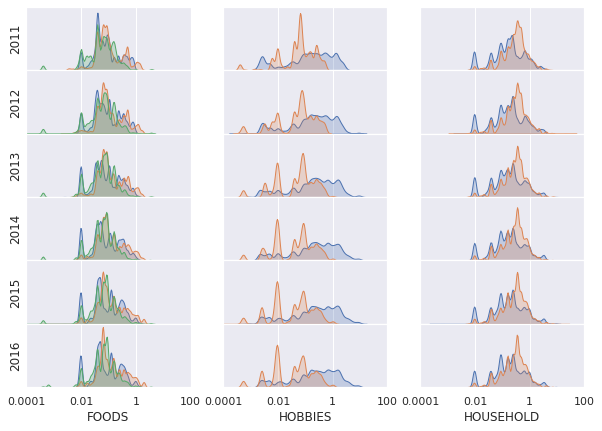

In [31]:
import seaborn as sns
fig, ax = plt.subplots(6,3,sharey=True,sharex=True, figsize=(10,7))

for i in n:
    j = 0 if i[0][:-2]=='FOODS' else (1 if i[0][:-2]=='HOBBIES' else 2)
    k = i[1] - 2011
    sns.kdeplot(np.log10(A.get_group(i)),legend=False,bw=0.1,shade=True,ax=ax[k,j])
    ax[k,j].set(xlabel = i[0][:-2], ylabel =k+2011)
fig.canvas.draw()
loc,labels = plt.xticks()
for ax in ax.flat:
    ax.label_outer()
    ax.set_xlim(-1,2)
    ax.set_xticklabels([10 ** int(i.get_text().replace(u'\u2212', '-')) for i in labels])
plt.yticks([], [])
fig.subplots_adjust( hspace = 0.0,wspace=0.2)
plt.show()

# **Trực quan doanh số dựa theo danh mục trong các ngày sự kiện và không sự kiện**

In [32]:
c = [datetime.date(2011, 12, 25),datetime.date(2012, 12, 25), datetime.date(2013, 12, 25),datetime.date(2014, 12, 25),datetime.date(2015, 12, 25)]
F = sale2.drop(labels=c,axis=1)
event_dates = cale4[pd.notnull(cale4['event_name_1'])]['date'] 
event_dates = [datetime.datetime.strptime(i, '%Y-%m-%d').date() for i in event_dates.values]

for i in c:
    event_dates.remove(i)
event_sales = F[['id','dept_id','cat_id', 'store_id', 'state_id']+event_dates[:-8]]
nevent_sales = F[F.drop(columns=event_dates[:-8]).columns]


In [33]:
N3 = []
L1 = []
L2 = []
L3 = []
means = []
e = event_sales.groupby(['cat_id']).sum()
ne = nevent_sales.groupby(['cat_id']).sum()
t = F.groupby(['cat_id']).sum()
means = t.mean(axis=1)
for i in range(3):
    n1 = lowess(e.iloc[i,:].values, range(e.shape[1]),frac=0.4)
    n2 = lowess(ne.iloc[i,:].values, range(ne.shape[1]),frac=0.4)
    n3 = lowess(t.iloc[i,:].values, range(t.shape[1]),frac=0.4)
    L1.append(n1[:,1])
    L2.append(n2[:,1])
    L3.append(n3[:,1])
    n3 = (t.iloc[i,:] - n3[:,1]) /(means[i])
    N3.append(n3)
N3 = pd.DataFrame(N3,columns = t.columns)
L1 = pd.DataFrame(L1,columns = e.columns)
L2 = pd.DataFrame(L2,columns = ne.columns)
L3 = pd.DataFrame(L3,columns = t.columns)


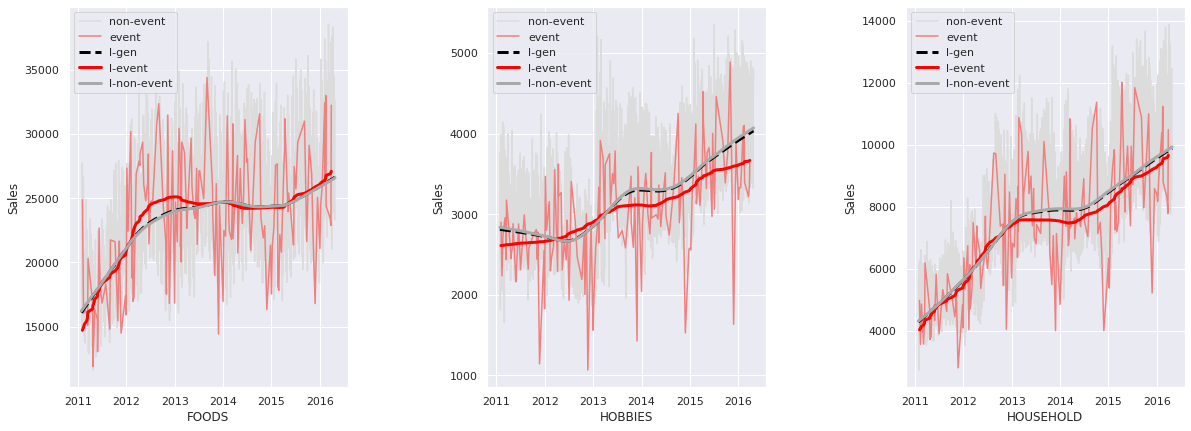

In [34]:
fig, ax = plt.subplots(1,3, figsize=(20,7))
for j in range(3):
    ax[j].plot(ne.iloc[j,:] ,color='gainsboro', label = 'non-event')
    ax[j].plot(e.iloc[j,:] ,color='lightcoral',label = 'event') 
    ax[j].plot(L3.iloc[j,:] ,color = 'black', linestyle= 'dashed',label = 'l-gen',linewidth=3) 
    ax[j].plot(L1.iloc[j,:] ,color='red',label = 'l-event',linewidth=3)   
    ax[j].plot(L2.iloc[j,:] ,color = 'darkgray',label = 'l-non-event',linewidth=3) 
    ax[j].grid(b=True,axis='y')
    ax[j].legend(loc='best')
    ax[j].set(xlabel = t.index[j] ,ylabel = 'Sales')

fig.subplots_adjust( hspace = 0.0,wspace=0.5)
plt.show()


In [35]:
N1 = N3[event_dates[:-8]].T.assign(Event='True')
N2 = N3[N3.drop(columns=event_dates[:-8]).columns].T.assign(Event='False')
cdf = pd.concat([N1,N2])
mdf = pd.melt(cdf, id_vars=['Event'], var_name=['Letter'])

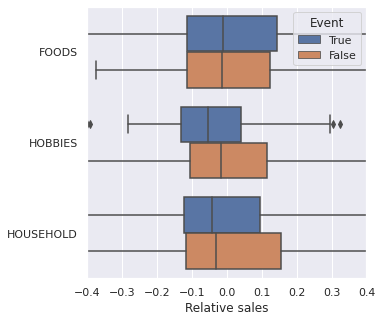

In [36]:
a = sns.boxplot(x="value", y="Letter", hue="Event", data=mdf, orient='h') 

a.set(xlabel="Relative sales",ylabel='')
a.set_xlim(-0.4, 0.4)
plt.show()

In [37]:
N3 = []
means = []
t = F.groupby(['cat_id']).sum()
means = t.mean(axis=1)
for i in range(3):
    n3 = lowess(t.iloc[i,:].values, range(t.shape[1]),frac=0.5)
    n3 = (t.iloc[i,:] - n3[:,1]) /(means[i])
    N3.append(n3)
N3 = pd.DataFrame(N3,columns = t.columns)

c = [datetime.date(2011, 12, 25),datetime.date(2012, 12, 25), datetime.date(2013, 12, 25),datetime.date(2014, 12, 25),datetime.date(2015, 12, 25)]
F = sale2.drop(labels=c,axis=1)
event_dates = cale4[pd.notnull(cale4['event_name_1'])][['date','event_type_1']] 
event_dates['date'] = [datetime.datetime.strptime(i, '%Y-%m-%d').date() for i in event_dates['date']]

for i in c:
    event_dates = event_dates[event_dates['date'] != i]


s = N3.T
s.reset_index(drop=False, inplace=True)
s.rename(columns = {'index':'date'},inplace=True)
s = pd.merge(left=event_dates, right=s, how='left', left_on='date', right_on='date')

s = s.groupby(['event_type_1']).median()
s.reset_index(drop=False, inplace=True)
s = s.melt(id_vars=['event_type_1'], value_vars=s.columns[1:])

[Text(0, 0.5, ''), Text(0.5, 0, 'Median sales')]

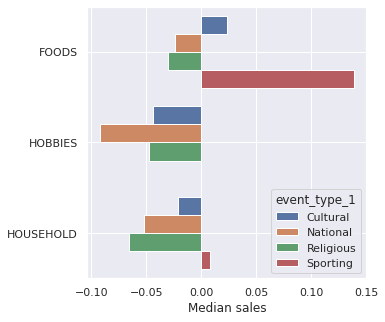

In [38]:
a=sns.barplot(x=s.value,y=s.variable,hue=s.event_type_1)
a.grid(b=True,axis='y')
a.set(xlabel="Median sales",ylabel='')

# **Trực quan doanh số trên các bang trong các ngày sự kiện và không sự kiện**

In [39]:
c = [datetime.date(2011, 12, 25),datetime.date(2012, 12, 25), datetime.date(2013, 12, 25),datetime.date(2014, 12, 25),datetime.date(2015, 12, 25)]
F = sale2.drop(labels=c,axis=1)
event_dates = cale4[pd.notnull(cale4['event_name_1'])]['date'] 
event_dates = [datetime.datetime.strptime(i, '%Y-%m-%d').date() for i in event_dates.values]

for i in c:
    event_dates.remove(i)
event_sales = F[['id','dept_id','cat_id', 'store_id', 'state_id']+event_dates[:-8]]
nevent_sales = F[F.drop(columns=event_dates[:-8]).columns]

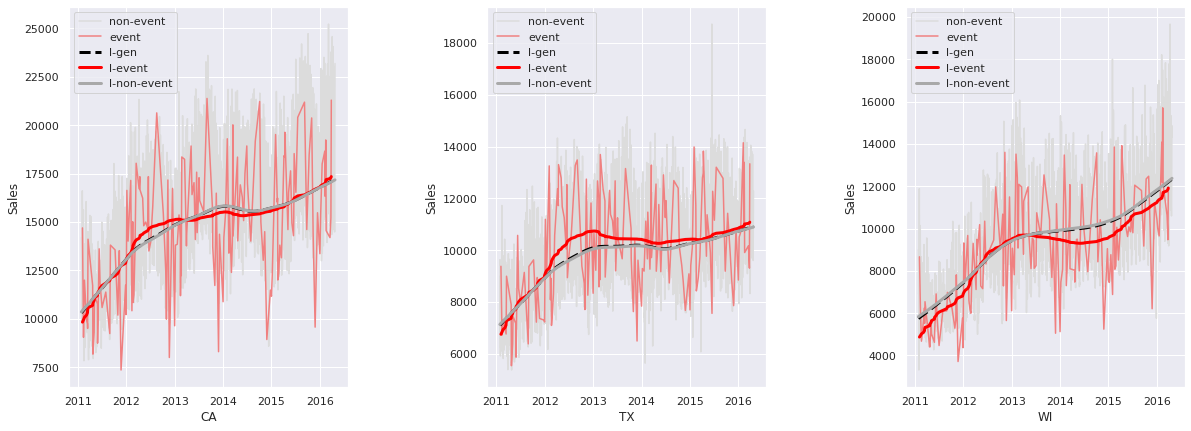

In [40]:
N3 = []
L1 = []
L2 = []
L3 = []
means = []
e = event_sales.groupby(['state_id']).sum()
ne = nevent_sales.groupby(['state_id']).sum()
t = F.groupby(['state_id']).sum()
means = t.mean(axis=1)
for i in range(3):
    n1 = lowess(e.iloc[i,:].values, range(e.shape[1]),frac=0.4)
    n2 = lowess(ne.iloc[i,:].values, range(ne.shape[1]),frac=0.4)
    n3 = lowess(t.iloc[i,:].values, range(t.shape[1]),frac=0.4)
    L1.append(n1[:,1])
    L2.append(n2[:,1])
    L3.append(n3[:,1])
    n3 = (t.iloc[i,:] - n3[:,1]) /(means[i])
    N3.append(n3)
N3 = pd.DataFrame(N3,columns = t.columns)
L1 = pd.DataFrame(L1,columns = e.columns)
L2 = pd.DataFrame(L2,columns = ne.columns)
L3 = pd.DataFrame(L3,columns = t.columns)
fig, ax = plt.subplots(1,3, figsize=(20,7))
for j in range(3):
    ax[j].plot(ne.iloc[j,:] ,color='gainsboro', label = 'non-event')
    ax[j].plot(e.iloc[j,:] ,color='lightcoral',label = 'event') 
    ax[j].plot(L3.iloc[j,:] ,color = 'black', linestyle= 'dashed',label = 'l-gen',linewidth=3) 
    ax[j].plot(L1.iloc[j,:] ,color='red',label = 'l-event',linewidth=3)   
    ax[j].plot(L2.iloc[j,:] ,color = 'darkgray',label = 'l-non-event',linewidth=3) 
    ax[j].grid(b=True,axis='y')
    ax[j].legend(loc='best')
    ax[j].set(xlabel = t.index[j] ,ylabel = 'Sales')

fig.subplots_adjust( hspace = 0.0,wspace=0.5)
plt.show()

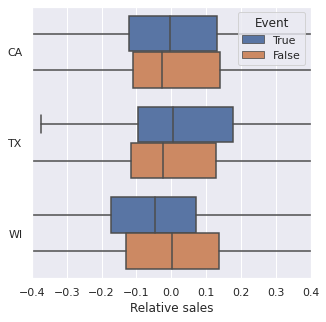

In [41]:
N1 = N3[event_dates[:-8]].T.assign(Event='True')
N2 = N3[N3.drop(columns=event_dates[:-8]).columns].T.assign(Event='False')
cdf = pd.concat([N1,N2])
mdf = pd.melt(cdf, id_vars=['Event'], var_name=['Letter'])
a = sns.boxplot(x="value", y="Letter", hue="Event", data=mdf, orient='h') 

a.set(xlabel="Relative sales",ylabel='')
a.set_xlim(-0.4, 0.4)
plt.show()

[Text(0, 0.5, ''), Text(0.5, 0, 'Median sales')]

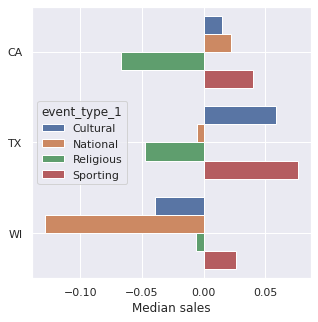

In [42]:

N3 = []
means = []
t = F.groupby(['state_id']).sum()
means = t.mean(axis=1)
for i in range(3):
    n3 = lowess(t.iloc[i,:].values, range(t.shape[1]),frac=0.5)
    n3 = (t.iloc[i,:] - n3[:,1]) /(means[i])
    N3.append(n3)
N3 = pd.DataFrame(N3,columns = t.columns)

event_dates = cale4[pd.notnull(cale4['event_name_1'])][['date','event_type_1']] 
event_dates['date'] = [datetime.datetime.strptime(i, '%Y-%m-%d').date() for i in event_dates['date'].values]
for i in c:
    event_dates = event_dates[event_dates['date'] != i]
event_dates = event_dates.iloc[:-8,:]

s = N3.T
s.reset_index(drop=False, inplace=True)
s.rename(columns = {'index':'date'},inplace=True)
s = pd.merge(left=event_dates, right=s, how='left', left_on='date', right_on='date')

s = s.groupby(['event_type_1']).median()
s.reset_index(drop=False, inplace=True)
s = s.melt(id_vars=['event_type_1'], value_vars=s.columns[1:])


a=sns.barplot(x=s.value,y=s.variable,hue=s.event_type_1)
a.grid(b=True,axis='y')
a.set(xlabel="Median sales",ylabel='')

In [43]:
c = [datetime.date(2011, 12, 25),datetime.date(2012, 12, 25), datetime.date(2013, 12, 25),datetime.date(2014, 12, 25),datetime.date(2015, 12, 25)]
F = sale2.drop(labels=c,axis=1)
F = F.groupby(['state_id']).sum()
CA_snap = cale4.date[cale4.snap_CA == 1].values
TX_snap = cale4.date[cale4.snap_TX == 1].values
WI_snap = cale4.date[cale4.snap_WI == 1].values
CA_snap = [datetime.datetime.strptime(i, '%Y-%m-%d').date() for i in CA_snap]
TX_snap = [datetime.datetime.strptime(i, '%Y-%m-%d').date() for i in TX_snap]
WI_snap = [datetime.datetime.strptime(i, '%Y-%m-%d').date() for i in WI_snap]

CA_snap_sales = F[CA_snap[:-20]].iloc[0,:]
TX_snap_sales = F[TX_snap[:-20]].iloc[1,:]
WI_snap_sales = F[WI_snap[:-20]].iloc[2,:]

CA_nsnap_sales = F[F.drop(columns=CA_snap[:-20]).columns].iloc[0,:]
TX_nsnap_sales = F[F.drop(columns=TX_snap[:-20]).columns].iloc[1,:]
WI_nsnap_sales = F[F.drop(columns=WI_snap[:-20]).columns].iloc[2,:]


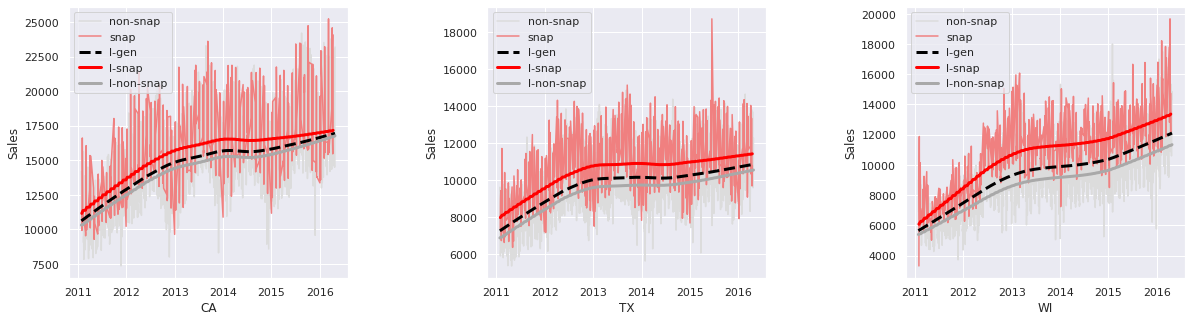

In [44]:
N3 = []
L1 = []
L2 = []
L3 = []
means = []
e = [CA_snap_sales,TX_snap_sales,WI_snap_sales]
ne = [CA_nsnap_sales,TX_nsnap_sales,WI_nsnap_sales]
t = F
means = t.mean(axis=1)
for i in range(3):
    n1 = lowess(e[i].values, range(len(e[i])),frac=0.5)
    n2 = lowess(ne[i].values, range(len(ne[i])),frac=0.5)
    nn3 = lowess(t.iloc[i,:].values, range(t.shape[1]),frac=0.5)
    n1 = pd.Series(n1[:,1],e[i].index)
    n2 = pd.Series(n2[:,1],ne[i].index)
    n3 = pd.Series(nn3[:,1],t.columns)
    L1.append(n1)
    L2.append(n2)
    L3.append(n3)
    n3 = (t.iloc[i,:] - nn3[:,1]) /(means[i])
    N3.append(n3)
N3 = pd.DataFrame(N3,columns = t.columns)

fig, ax = plt.subplots(1,3, figsize=(20,5))
for j in range(3):
    ax[j].plot(ne[j] ,color='gainsboro', label = 'non-snap')
    ax[j].plot(e[j],color='lightcoral',label = 'snap') 
    ax[j].plot(L3[j] ,color = 'black', linestyle= 'dashed',label = 'l-gen',linewidth=3) 
    ax[j].plot(L1[j] ,color='red',label = 'l-snap',linewidth=3)   
    ax[j].plot(L2[j] ,color = 'darkgray',label = 'l-non-snap',linewidth=3) 
    ax[j].grid(b=True,axis='y')
    ax[j].legend(loc='best')
    ax[j].set(xlabel = t.index[j] ,ylabel = 'Sales')

fig.subplots_adjust( hspace = 0.0,wspace=0.5)
plt.show()
